# Search PSF-stars in FOV

This notebook is demonstrating an automated searching of the PSF-stars in the Field of view. Then, the FWHM of a PSF is measured as Gaussian.  

## Load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits

#Data is available at: https://drive.google.com/file/d/1Axwo-aD5yFrkuHIlYBsQ8ma1nHRpcAHg/view?usp=sharing
#this drizzled image is based on HST Programme GO-15115 (PI: John Silverman),
#More details see Ding et al. 2020 ApJ 888 37 

fitsFile = pyfits.open('../example_files/HST/QSO/1147_final_drz.fits')  

#Load the fov image data:
fov_image = fitsFile[1].data # check the back grounp

#Derive the header informaion, might be used to obtain the pixel scale and the exposure time.
header = fitsFile[1].header # if target position is add in WCS, the header should have the wcs information, i.e. header['EXPTIME']

import galight.tools.astro_tools as astro_tools

#Load the WHT map, which would be use to derive the exposure map
wht = fitsFile[2].data

exp =  astro_tools.read_fits_exp(fitsFile[0].header)  #Read the exposure time 
mean_wht = exp * (0.0642/0.135)**2  #The drizzle information is used to derive the mean WHT value.
exp_map = exp * wht/mean_wht  #Derive the exposure time map for each pixel

## Load data to ``galight``

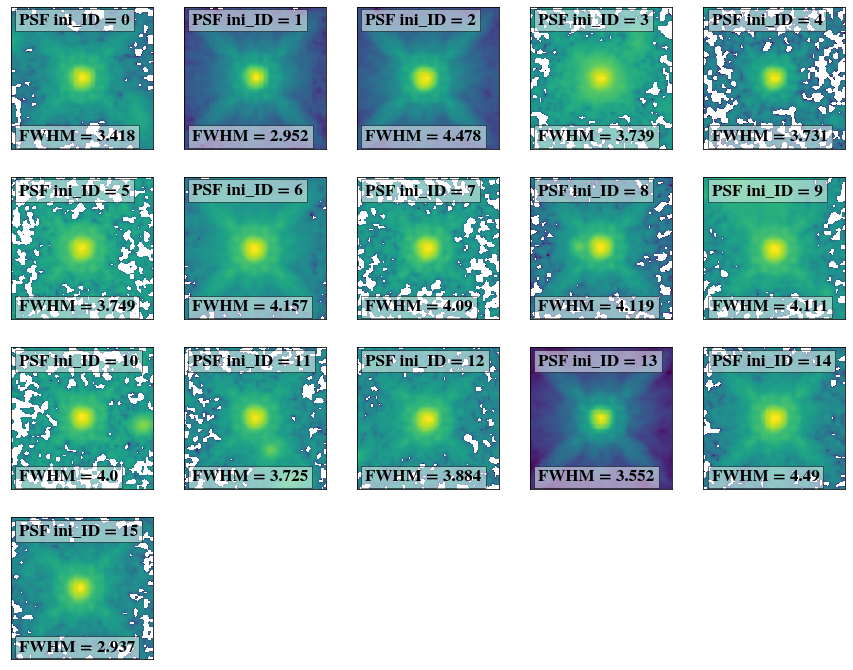

Input directly the PSF inital id to select, use space between each id:
 (press Enter to selet all)



In [3]:
from galight.data_process import DataProcess

#keywords see the notes above.
data_process = DataProcess(fov_image = fov_image, target_pos = [1142., 637.], pos_type = 'pixel', header = header,
                          rm_bkglight = False, exptime = exp_map, if_plot=False, zp = 27.0)  #zp use 27.0 for convinence.

data_process.find_PSF(radius = 30, user_option = True) #Try this line out! 

/Users/Dartoon/Astro/my_packages/galight/galight/tools/cutout_tools.py:156: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(img,origin='lower', cmap=my_cmap, norm=LogNorm(), vmin=vmin, vmax=vmax)


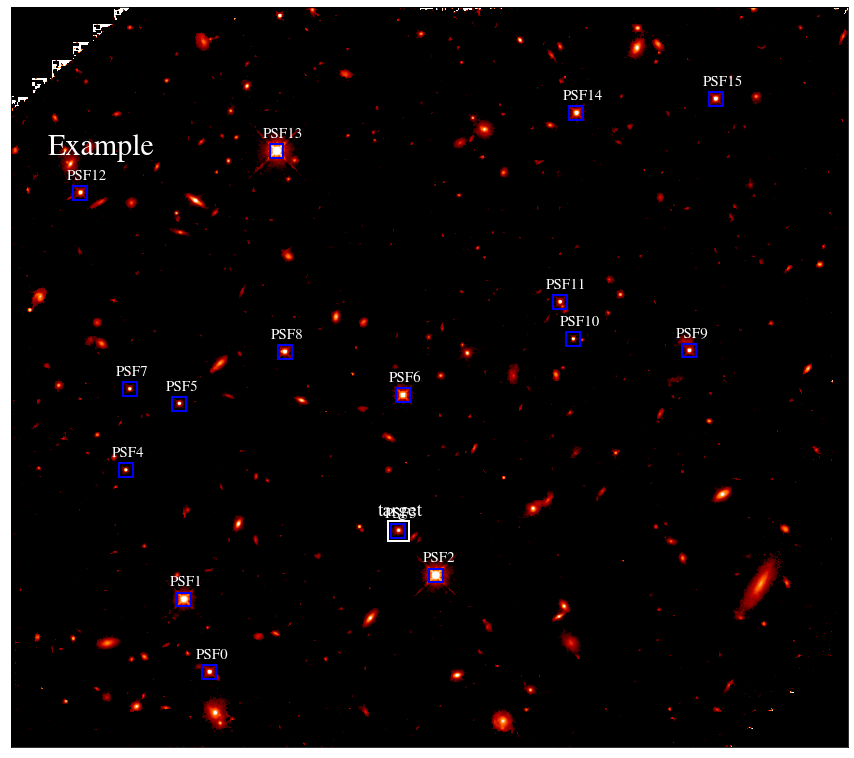

In [4]:
data_process.plot_overview(label = 'Example', target_label = None)

# Now, let's measure the 